In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import thư viện


In [ ]:
#Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

#Database

In [ ]:
url="/content/drive/MyDrive/AMD.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-01,3.55,3.90,3.55,3.82,3.82,16236600
1,2009-05-04,3.90,4.30,3.83,4.26,4.26,21256400
2,2009-05-05,4.36,4.39,4.11,4.32,4.32,16369800
3,2009-05-06,4.45,4.45,4.12,4.31,4.31,15076500
4,2009-05-07,4.22,4.35,3.91,4.01,4.01,23408000


In [ ]:
#Chuyển đổi dữ liệu
#Chuyển đổi kiểu dữ liệu cột date từ object thành datetime
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-01,3.550000,3.900000,3.550000,3.820000,3.820000,16236600
1,2009-05-04,3.900000,4.300000,3.830000,4.260000,4.260000,21256400
2,2009-05-05,4.360000,4.390000,4.110000,4.320000,4.320000,16369800
3,2009-05-06,4.450000,4.450000,4.120000,4.310000,4.310000,15076500
4,2009-05-07,4.220000,4.350000,3.910000,4.010000,4.010000,23408000
...,...,...,...,...,...,...,...
3786,2024-05-16,160.919998,168.059998,159.899994,162.619995,162.619995,76726700
3787,2024-05-17,168.429993,169.720001,162.320007,164.470001,164.470001,65944400
3788,2024-05-20,165.550003,168.490005,164.470001,166.330002,166.330002,45618000
3789,2024-05-21,164.000000,165.830002,163.100006,164.660004,164.660004,30005500


In [ ]:
df.shape

(3791, 7)

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-01,3.55,3.90,3.55,3.82,3.82,16236600
1,2009-05-04,3.90,4.30,3.83,4.26,4.26,21256400
2,2009-05-05,4.36,4.39,4.11,4.32,4.32,16369800
3,2009-05-06,4.45,4.45,4.12,4.31,4.31,15076500
4,2009-05-07,4.22,4.35,3.91,4.01,4.01,23408000
5,2009-05-08,4.12,4.15,3.84,3.93,3.93,14316100
6,2009-05-11,3.90,4.37,3.87,4.22,4.22,25404600
7,2009-05-12,4.41,4.50,4.13,4.35,4.35,29756700
8,2009-05-13,4.36,4.67,4.33,4.38,4.38,35483300
9,2009-05-14,4.35,4.57,4.07,4.24,4.24,33859900


Trực quan hóa dữ liệu

In [ ]:
#Trực quan hóa dữ liệu
fig = px.line(y=df["Close"], x=df["Date"])
fig.update_traces(line_color="black")
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Scaled Price",
                  title={'text': "AMD History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='RGBA( 240, 248, 255, 1 )')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-01,3.550000,3.900000,3.550000,3.820000,3.820000,16236600
1,2009-05-04,3.900000,4.300000,3.830000,4.260000,4.260000,21256400
2,2009-05-05,4.360000,4.390000,4.110000,4.320000,4.320000,16369800
3,2009-05-06,4.450000,4.450000,4.120000,4.310000,4.310000,15076500
4,2009-05-07,4.220000,4.350000,3.910000,4.010000,4.010000,23408000
...,...,...,...,...,...,...,...
3786,2024-05-16,160.919998,168.059998,159.899994,162.619995,162.619995,76726700
3787,2024-05-17,168.429993,169.720001,162.320007,164.470001,164.470001,65944400
3788,2024-05-20,165.550003,168.490005,164.470001,166.330002,166.330002,45618000
3789,2024-05-21,164.000000,165.830002,163.100006,164.660004,164.660004,30005500


In [ ]:
df.drop(columns=["Adj Close"], inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2009-05-01,3.550000,3.900000,3.550000,3.820000,16236600
1,2009-05-04,3.900000,4.300000,3.830000,4.260000,21256400
2,2009-05-05,4.360000,4.390000,4.110000,4.320000,16369800
3,2009-05-06,4.450000,4.450000,4.120000,4.310000,15076500
4,2009-05-07,4.220000,4.350000,3.910000,4.010000,23408000
...,...,...,...,...,...,...
3786,2024-05-16,160.919998,168.059998,159.899994,162.619995,76726700
3787,2024-05-17,168.429993,169.720001,162.320007,164.470001,65944400
3788,2024-05-20,165.550003,168.490005,164.470001,166.330002,45618000
3789,2024-05-21,164.000000,165.830002,163.100006,164.660004,30005500


#Linear Regression Hồi Quy Tuyến Tính

In [ ]:
#Tách dữ liệu thành bộ đào tạo & kiểm tra
test_size = df[df.Date.dt.year==2024].shape[0]
test_size

99

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Close'])
y = df['Close'].values.reshape((-1, 1))


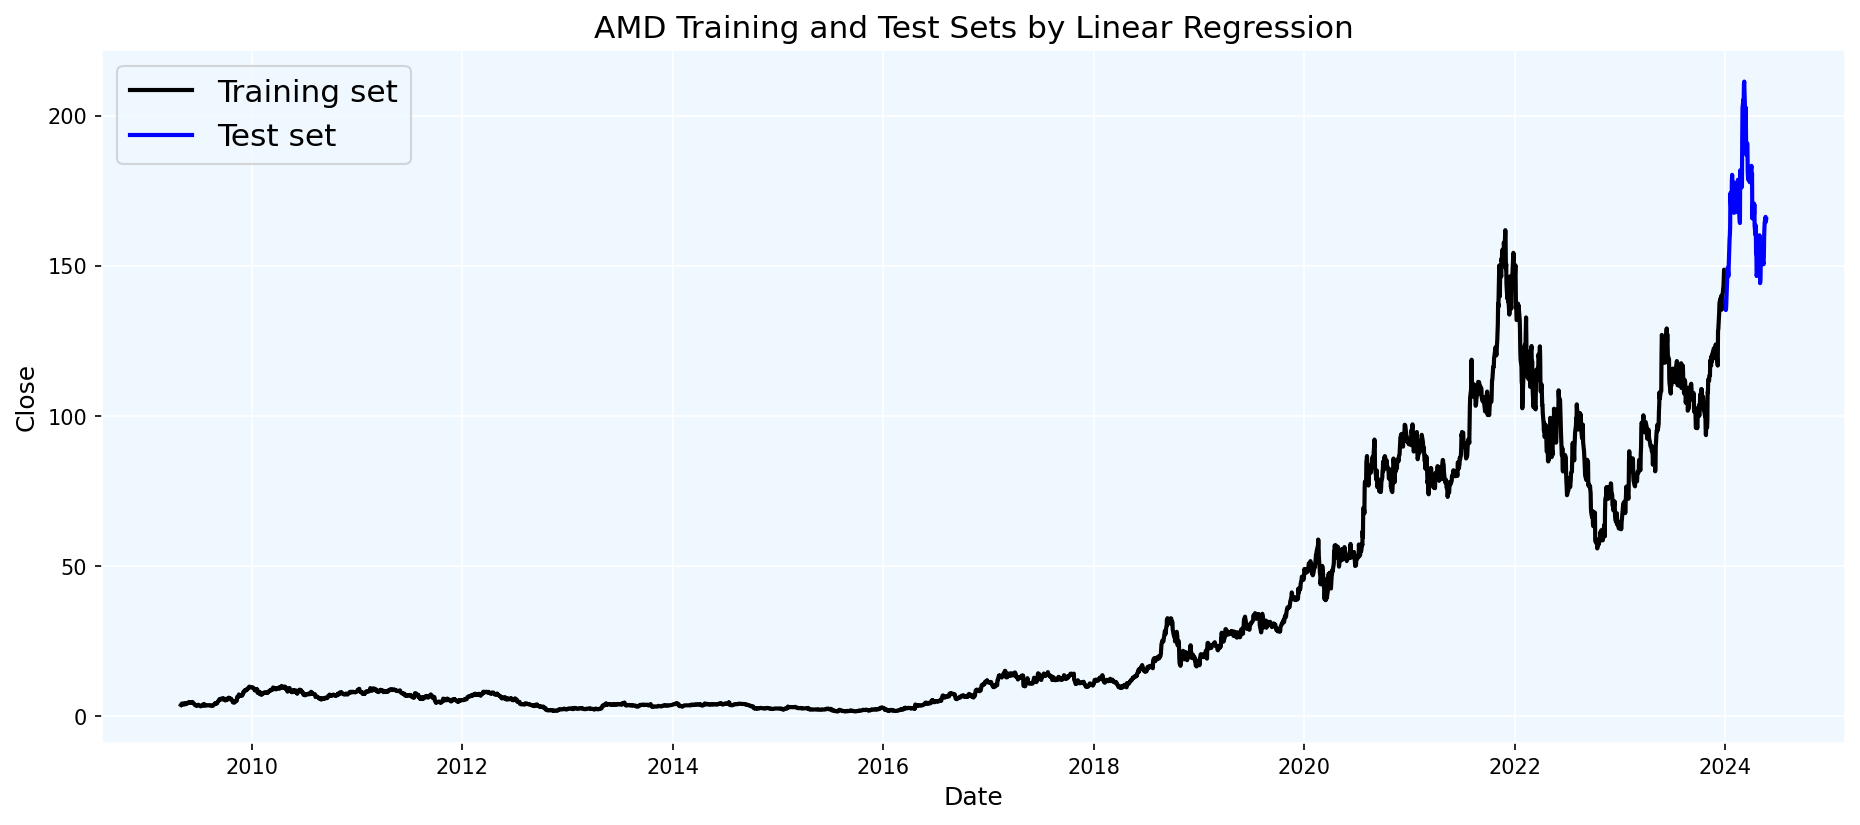

In [ ]:
#Tiến hành training và vẽ biểu đồ
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'AliceBlue'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Close[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Close[-test_size:], color='blue', lw=2)
plt.title('AMD Training and Test Sets by Linear Regression', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
window_size = 60

In [ ]:
train_data = df.Close[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [ ]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df.Close[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print("X train shape",X_train.shape)
print("X test shape",X_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

X train shape (3632, 60)
X test shape (99, 60)
y train shape (3632,)
y test shape (99,)


In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
mse_Liner = mean_squared_error(y_test, y_pred)
print(f'Độ lỗi trên tập train: {mse_Liner}')

Độ lỗi trên tập train: 0.0006744152704997372


In [ ]:
y_pred[0:10]

array([0.69673287, 0.65241944, 0.64097885, 0.64303224, 0.65417622,
       0.68715024, 0.70118124, 0.6915676 , 0.70122046, 0.69335572])

In [ ]:
y_test[0:10]

array([0.65293668, 0.63739514, 0.64068455, 0.65293668, 0.68916852,
       0.70385198, 0.70041948, 0.69794051, 0.69098014, 0.74904654])

In [ ]:
y_pred.shape

(99,)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_Liner = mean_absolute_percentage_error(y_test, y_pred)
Accuracy_Liner = 1 - MAPE_Liner

print("Test MAPE:", MAPE_Liner)
print(f'Test Accuracy: {Accuracy_Liner*100:.2f}% ')

Test MAPE: 0.02380105153727513
Test Accuracy: 97.62% 


Xem mức độ chính xác mô hình dự đoán với thực tế

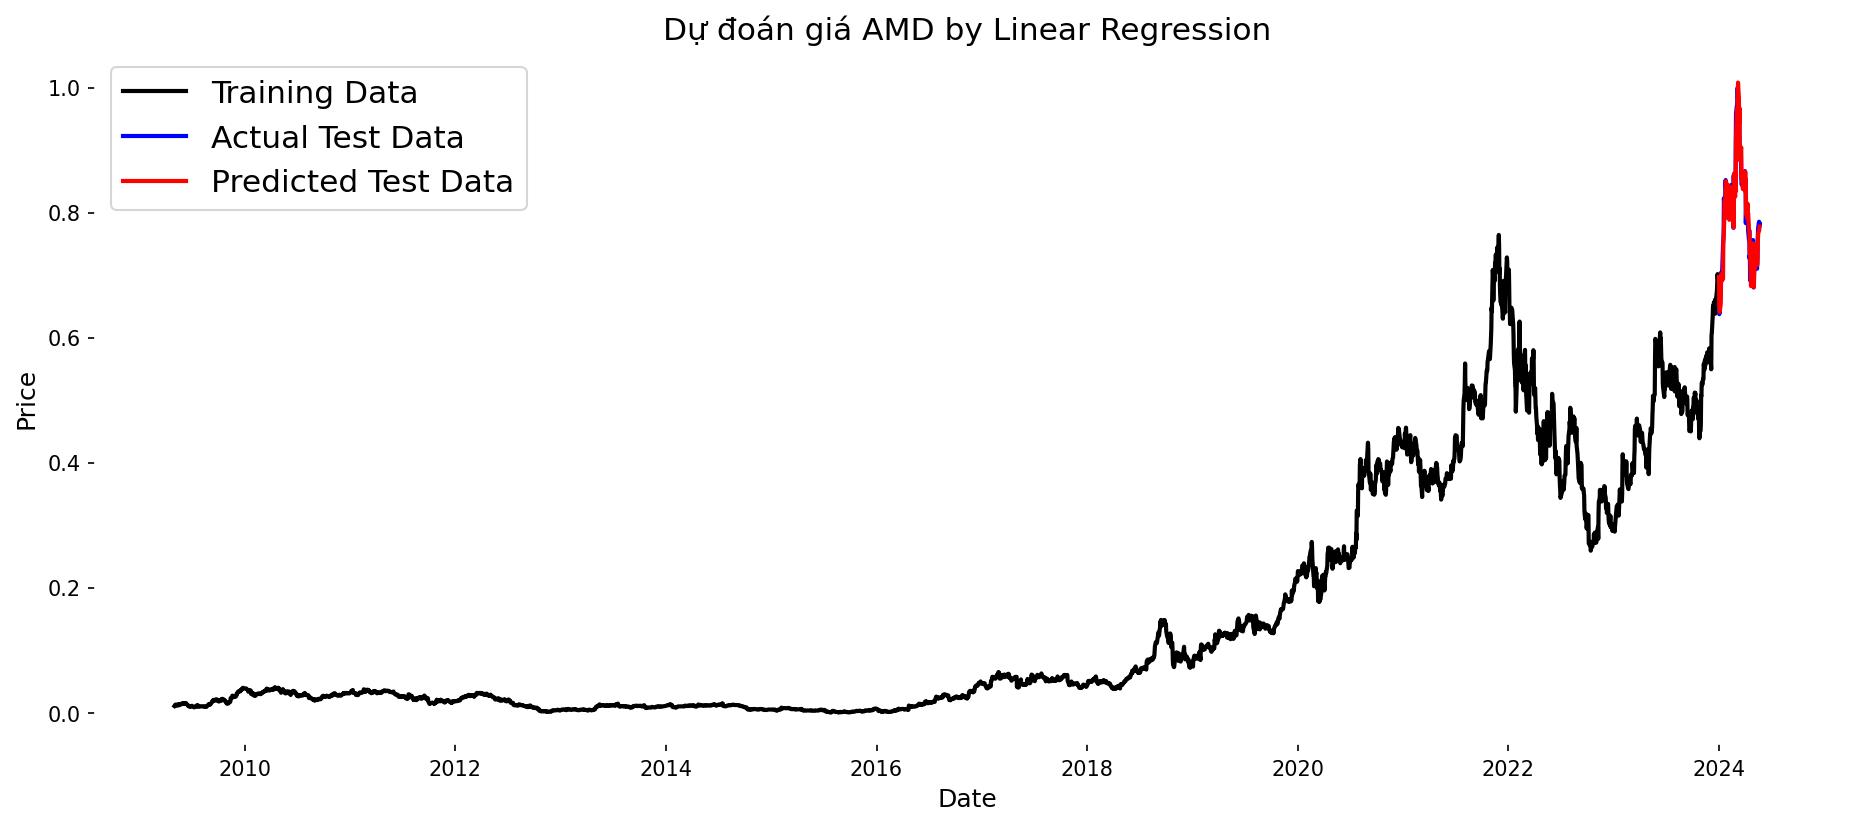

In [ ]:
# Xem mức độ chính xác mô hình dự đoán với thực tế :__
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], train_data, color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_pred, color='red', lw=2)
plt.title('Dự đoán giá AMD by Linear Regression', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

Chi tiết

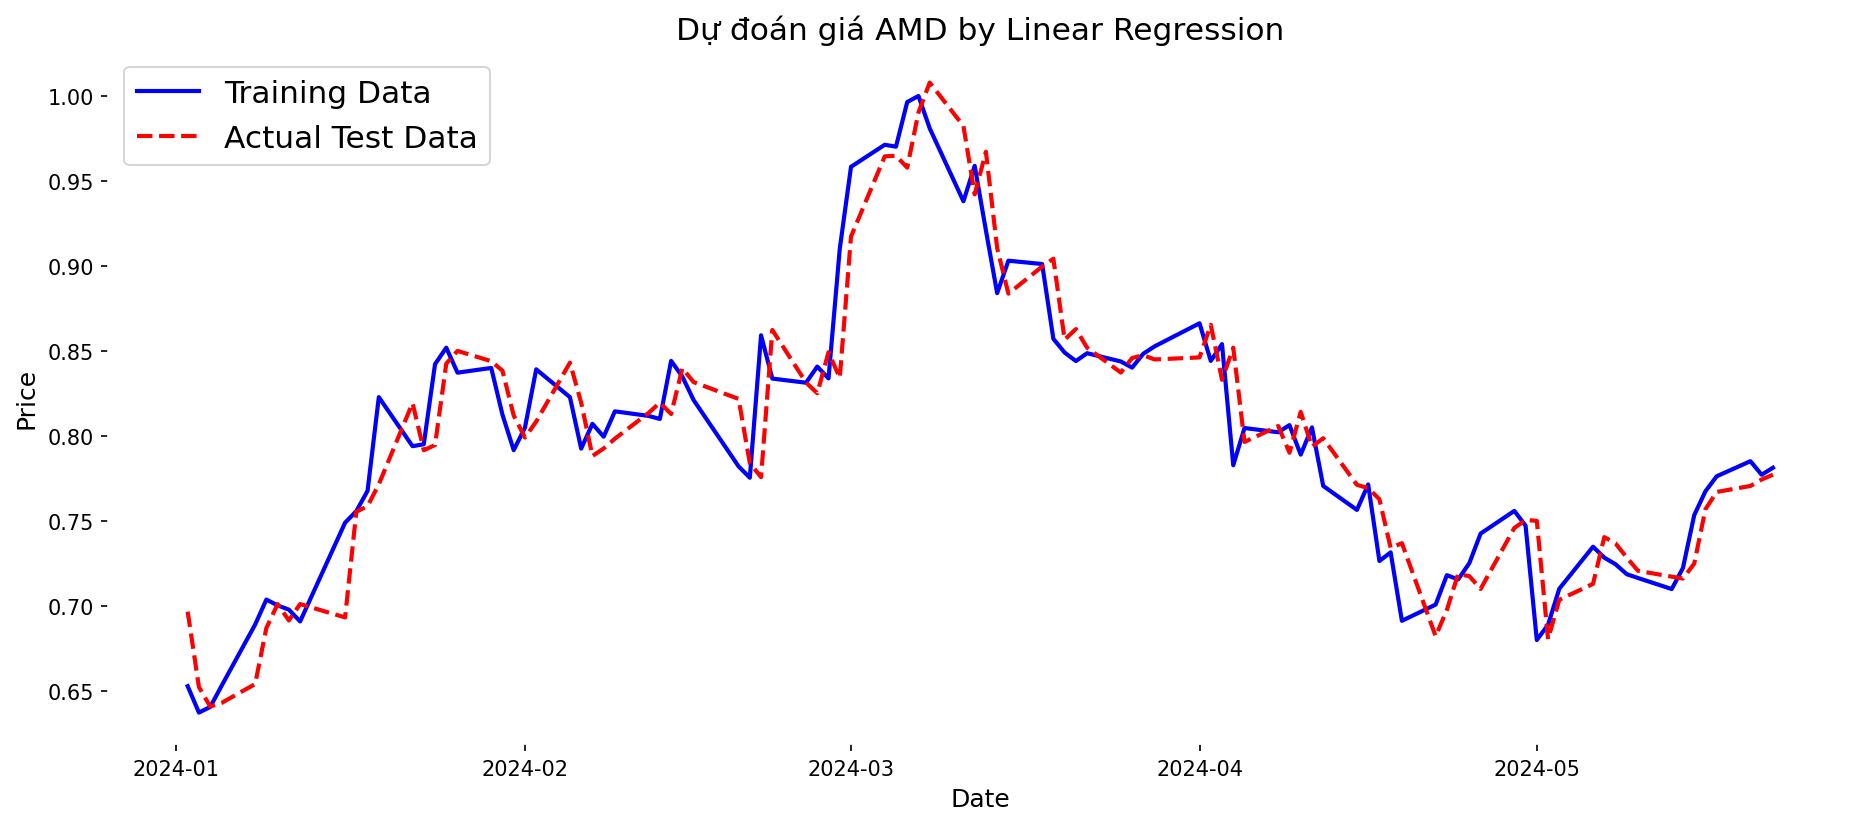

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.plot(df['Date'].iloc[-test_size:], y_test, color='blue', linestyle='-', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_pred,  color='red', linestyle='--', lw=2)
plt.title('Dự đoán giá AMD by Linear Regression', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

#LSTM Long short-term memory

In [ ]:
#Tách dữ liệu thành bộ đào tạo & kiểm tra
test_size = df[df.Date.dt.year==2024].shape[0]
test_size

99

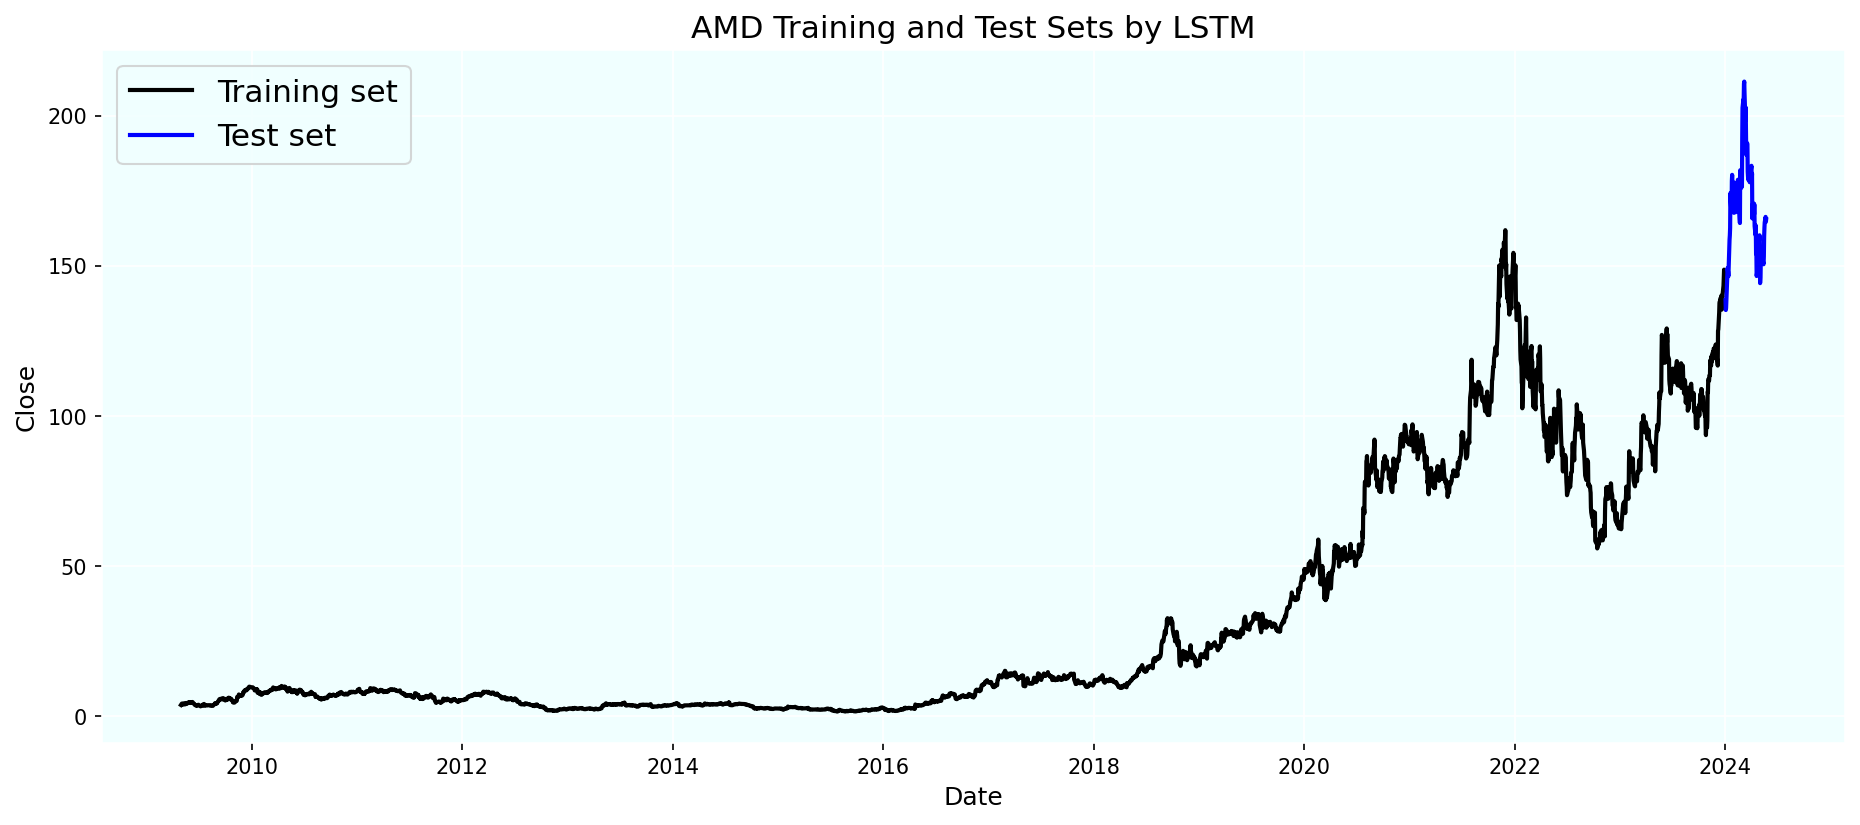

In [ ]:
#Tiến hành training và vẽ biểu đồ
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'Azure'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Close[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Close[-test_size:], color='blue', lw=2)
plt.title('AMD Training and Test Sets by LSTM', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
window_size = 60

In [ ]:
train_data = df.Close[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [ ]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df.Close[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (3632, 60, 1)
y_train Shape:  (3632, 1)
X_test Shape:   (99, 60, 1)
y_test Shape:   (99, 1)


cấu hình model

In [ ]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model

In [ ]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

In [ ]:
result_LSTM = model.evaluate(X_test, y_test)
y_pred_LSTM = model.predict(X_test)

MAPE_LSTM = mean_absolute_percentage_error(y_test, y_pred_LSTM)
Accuracy_LSTM = 1 - MAPE_LSTM

print("Test Loss:", result_LSTM)
print("Test MAPE:", MAPE_LSTM)
print(f'Test Accuracy: {Accuracy_LSTM*100:.5f}% ')

4/4 [==============================] - 1s 26ms/step
Test Loss: 0.015224644914269447
Test MAPE: 0.1263477131090748
Test Accuracy: 87.36523% 


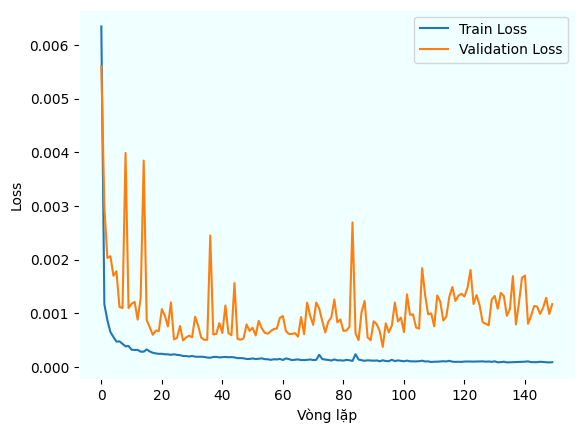

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Vòng lặp')
plt.ylabel('Loss')
plt.legend()
plt.show()

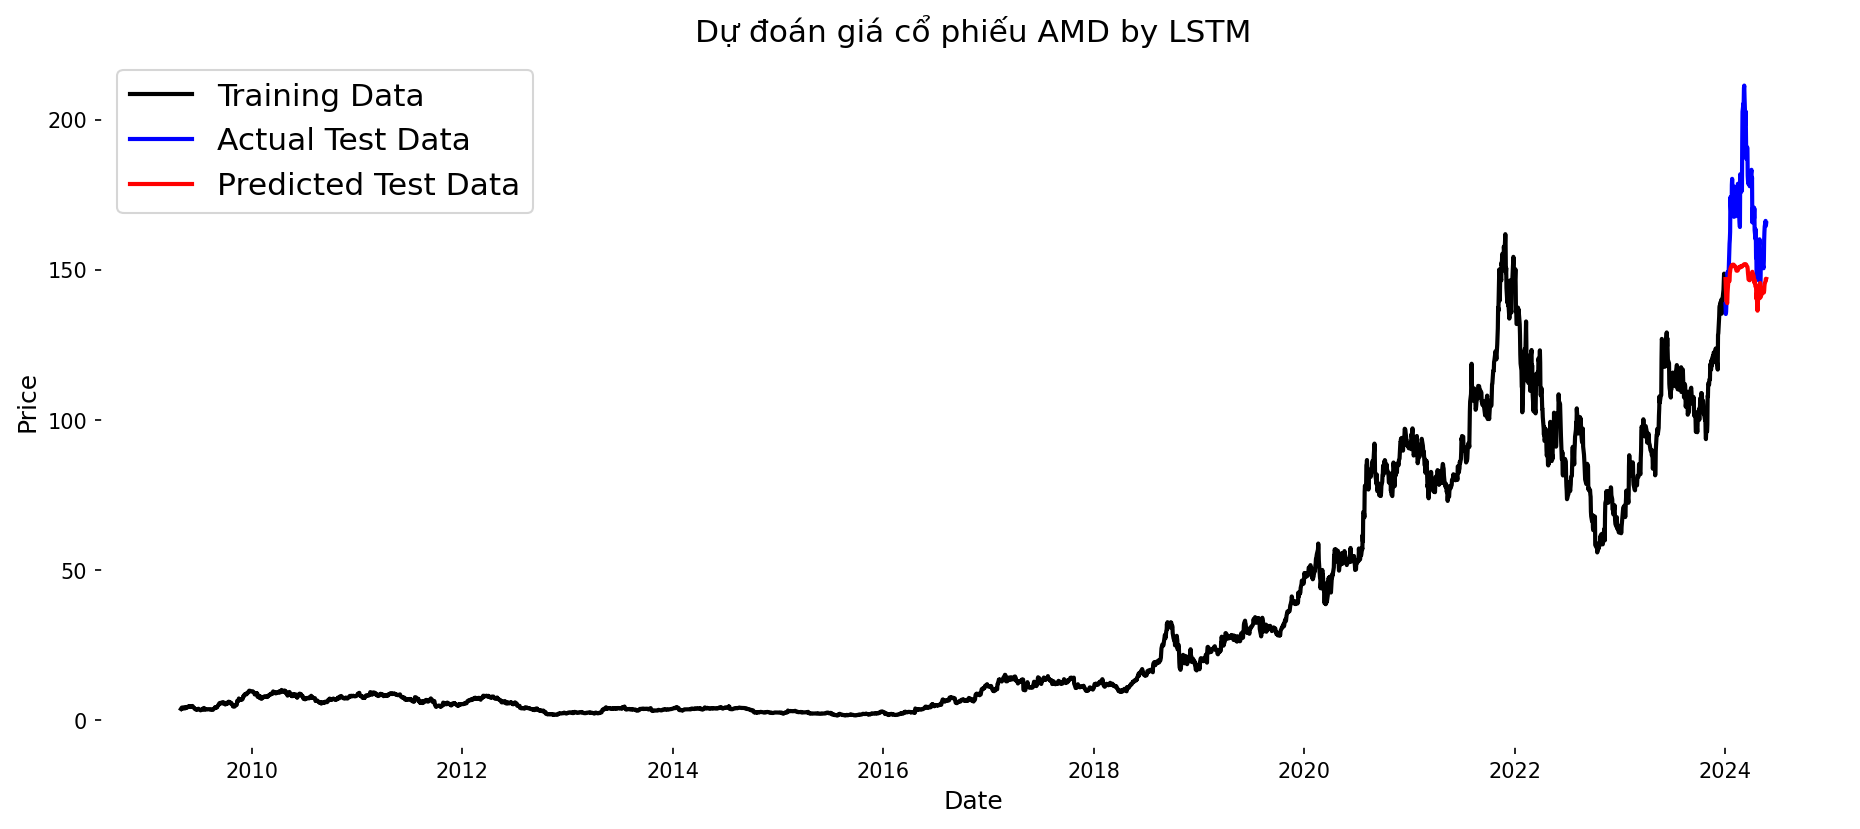

In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred_LSTM)

# Xem mức độ chính xác mô hình dự đoán với thực tế :__

plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Dự đoán giá cổ phiếu AMD by LSTM', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

#RNN Recurrent neural network

In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Nadam

def define_model():
    input1 = Input(shape=(window_size,1))
    x = SimpleRNN(units=64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = SimpleRNN(units=64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = SimpleRNN(units=64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer=Nadam())
    model.summary()

    return model

In [ ]:
model_RNN = define_model()
history = model_RNN.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 60, 64)            4224      
                                                                 
 dropout_3 (Dropout)         (None, 60, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 64)            8256      
                                                                 
 dropout_4 (Dropout)         (None, 60, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0   

In [ ]:
result_RNN = model_RNN.evaluate(X_test, y_test)
y_pred_RNN = model_RNN.predict(X_test)

MAPE_RNN = mean_absolute_percentage_error(y_test, y_pred_RNN)
Accuracy_RNN = 1 - MAPE_RNN

print("Test Loss:", result_RNN)
print("Test MAPE:", MAPE_RNN)
print(f'Test Accuracy: {Accuracy_RNN*100:.5f}%')

4/4 [==============================] - 2s 21ms/step
Test Loss: 0.0027290298603475094
Test MAPE: 0.0480530195177144
Test Accuracy: 95.19470%


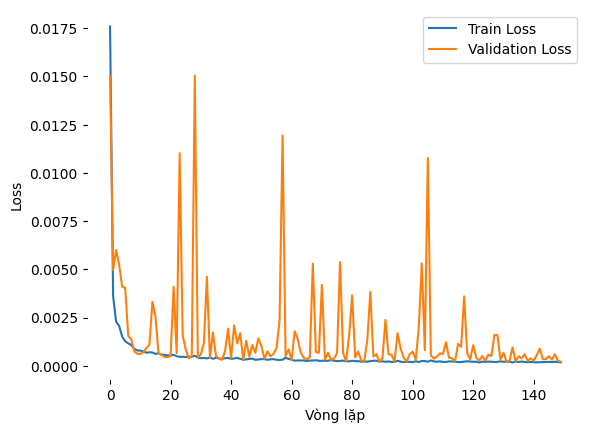

In [ ]:
plt.rcParams['axes.facecolor'] = 'White'
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Vòng lặp')
plt.ylabel('Loss')
plt.legend()
plt.show()

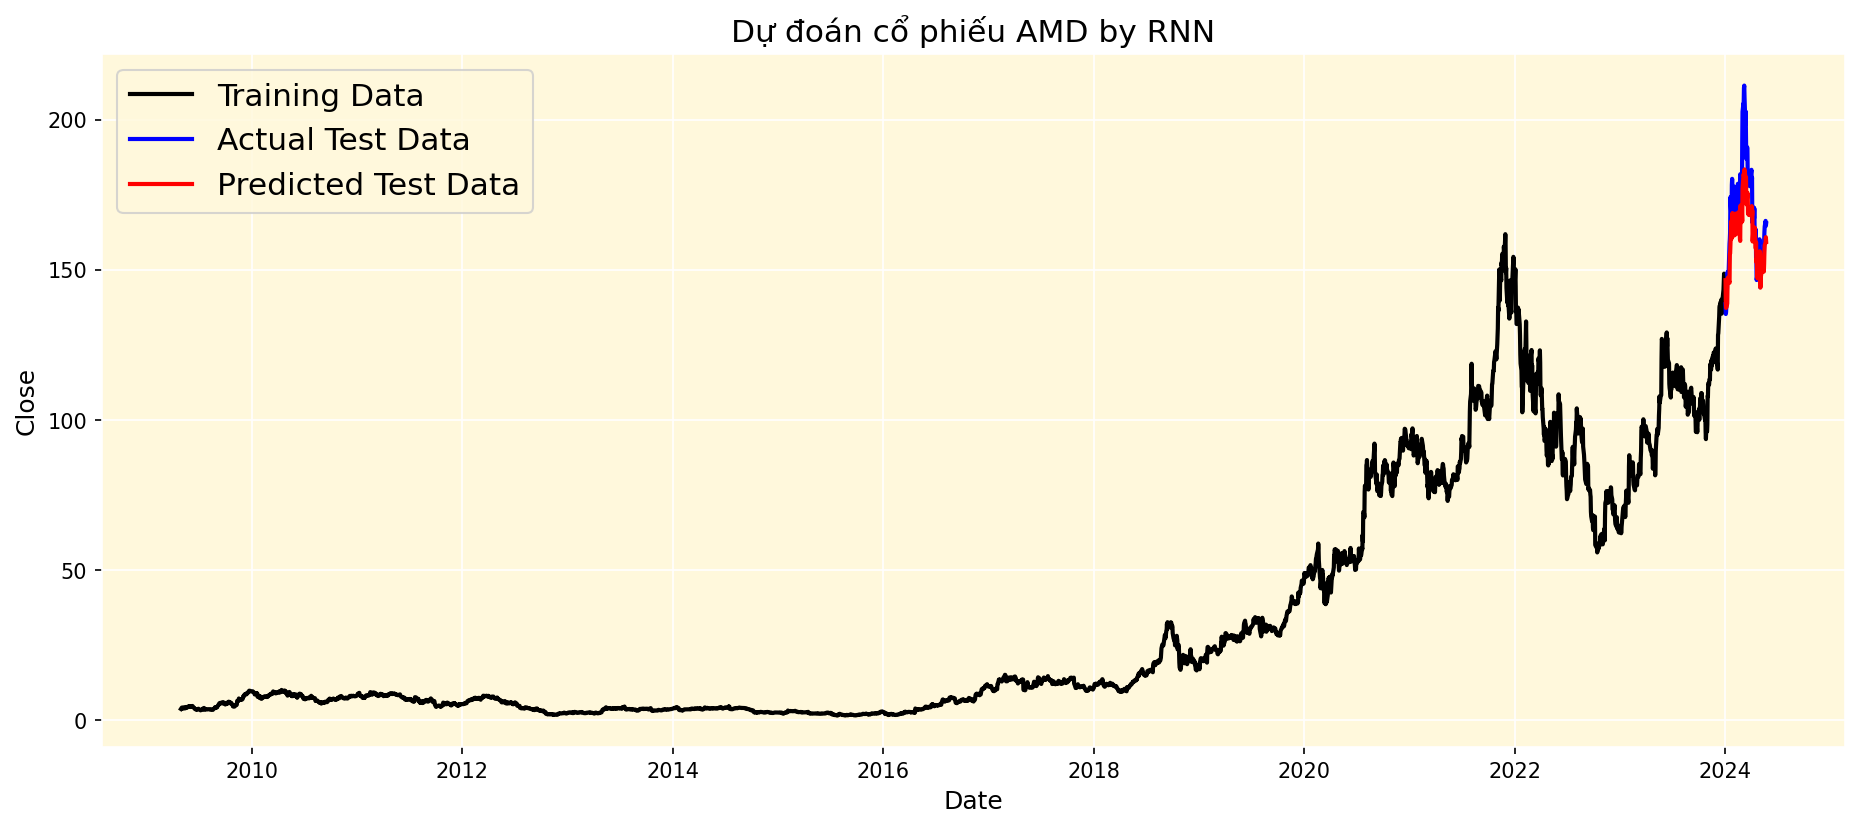

In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred_RNN)

# Xem mức độ chính xác mô hình dự đoán với thực tế:__

plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'Cornsilk'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Dự đoán cổ phiếu AMD by RNN', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

#SARIMA

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:

df_SARIMAX = df.set_index('Date')
df_SARIMAX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-01,3.550000,3.900000,3.550000,3.820000,3.820000,16236600
2009-05-04,3.900000,4.300000,3.830000,4.260000,4.260000,21256400
2009-05-05,4.360000,4.390000,4.110000,4.320000,4.320000,16369800
2009-05-06,4.450000,4.450000,4.120000,4.310000,4.310000,15076500
2009-05-07,4.220000,4.350000,3.910000,4.010000,4.010000,23408000
...,...,...,...,...,...,...
2024-05-16,160.919998,168.059998,159.899994,162.619995,162.619995,76726700
2024-05-17,168.429993,169.720001,162.320007,164.470001,164.470001,65944400
2024-05-20,165.550003,168.490005,164.470001,166.330002,166.330002,45618000


In [ ]:
df_SARIMAX.drop(["Volume", "Open", "High", "Low"], axis=1, inplace=True)

In [ ]:
df_SARIMAX

,Close
Date,
2009-05-01,3.820000
2009-05-04,4.260000
2009-05-05,4.320000
2009-05-06,4.310000
2009-05-07,4.010000
...,...
2024-05-16,162.619995
2024-05-17,164.470001
2024-05-20,166.330002


In [ ]:
df_SARIMAX.index.min(), df_SARIMAX.index.max()

(Timestamp('2009-05-01 00:00:00'), Timestamp('2024-05-22 00:00:00'))

<Axes: xlabel='Date'>

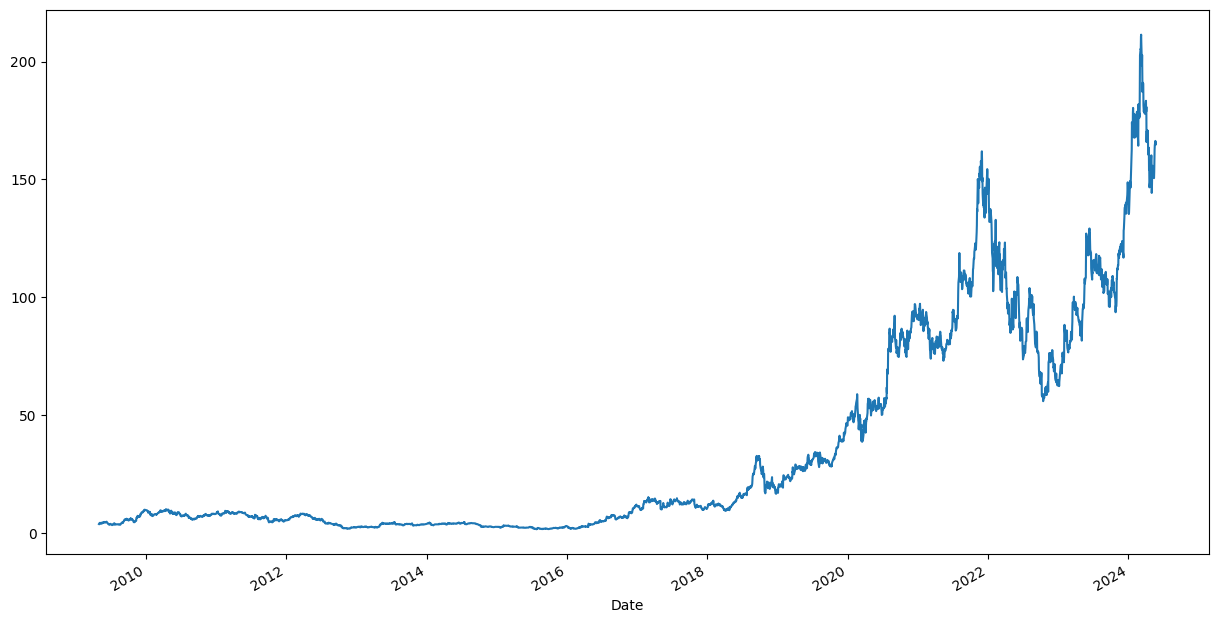

In [ ]:
df_SARIMAX['Close'].plot(figsize=(15,8))

In [ ]:
train, test = df_SARIMAX[:-test_size], df_SARIMAX[-test_size:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_SARIMAX=SARIMAX(train,order=(0,1,0), seasonal_order=(2, 1, 0, 6))
result_sarimax = model_SARIMAX.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 3692
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 6)   Log Likelihood               -7476.861
Date:                           Sun, 02 Jun 2024   AIC                          14959.722
Time:                                   07:51:06   BIC                          14978.358
Sample:                                        0   HQIC                         14966.356
                                          - 3692                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.6822      0.007    -95.013      0.000      -0.696      -0.668
ar.S.L12      -0.3534      0.007    -49.091      0.000      -0.368      -0.339
sigma2         3.3845      0.030    112.804      0.000       3.326       3.443
===================================================================================
Ljung-Box (L1) (Q):                   1.79   Jarque-Bera (JB):             21745.47
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):             200.47   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result_sarimax.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
y_test = test.values
predict = predictions.values
MAPE_ARIMA = mean_absolute_percentage_error(y_test, predictions)
Accuracy_ARIMA = 1 - MAPE_ARIMA

print("Test MAPE:", MAPE_ARIMA)
print(f'Test Accuracy: {Accuracy_ARIMA * 100:.2f}%')

Test MAPE: 0.31315299691450615
Test Accuracy: 68.68%


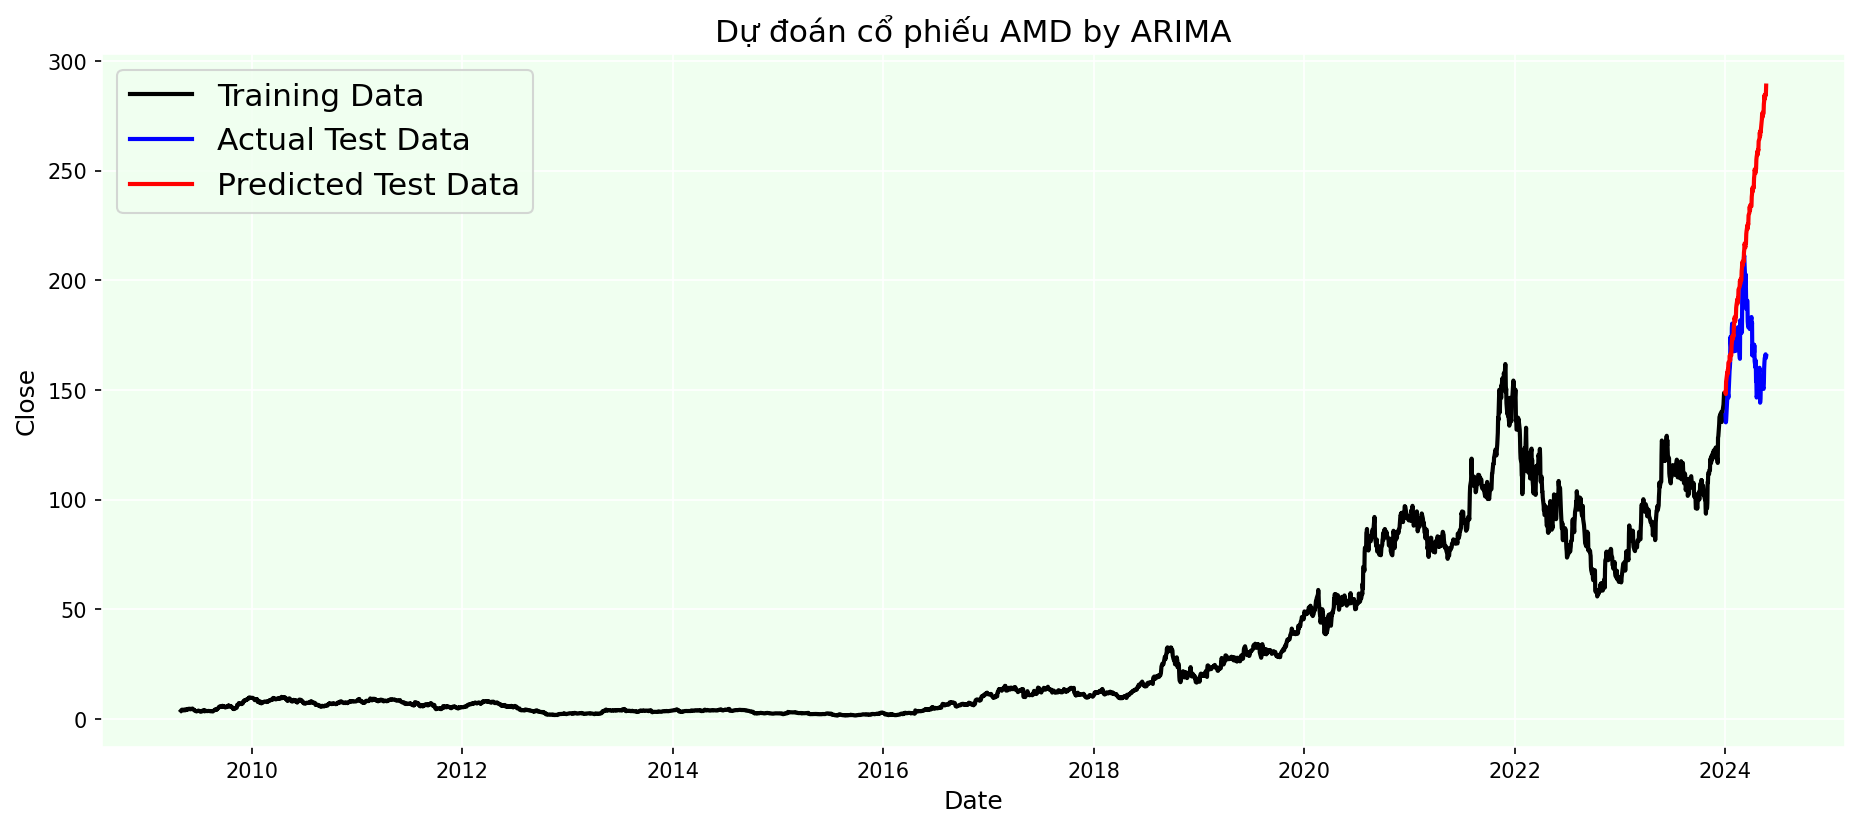

In [ ]:

plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'Honeydew'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], train, color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], test, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], predict, color='red', lw=2)
plt.title('Dự đoán cổ phiếu AMD by ARIMA', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

#KET QUA

LINEAR REGRESSION:
*  Test MAPE: 0.02380105153727513
*  Test Accuracy: 97.62%

LSTM:
*  TTest Loss: 0.015224644914269447
*  Test MAPE: 0.1263477131090748
*  Test Accuracy: 87.36523%


RNN:


*  Test Loss: 0.0027290298603475094
*  Test MAPE: 0.0480530195177144
*  Test Accuracy: 95.19470%


ARIMA
*  Test MAPE: 0.31315299691450615
*  Test Accuracy: 68.68%


